In [3]:
import time
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import datetime
import matplotlib.dates as mdates
from collections import deque
import numpy as np
from serial import Serial
import re

PORT = "COM3"

# How many sensor samples we want to store
HISTORY_SIZE = 2500

# Pause re-sampling the sensor and drawing for INTERVAL seconds
INTERVAL = 0.01


In [9]:
serialport = None

def get_imu_data():
    global serialport
    if not serialport:
        # open serial port
        serialport = Serial(PORT, 115200, timeout=0.1)
        # check which port was really used
        print("Opened", serialport.name)
        # Flush input
        time.sleep(3)
        serialport.readline()

    # Poll the serial port
    line = str(serialport.readline(), 'utf-8')
    if not line:
        return None
    print(line)
    if not "Uni:" in line:
        return None
    vals = line.replace("Uni:", "").strip().split(',')
    #print(vals)
    if len(vals) != 9:
        return None
    try:
        vals = [float(i) for i in vals]
    except ValueError:
        return None
    #print(vals)
    return vals

for _ in range(20):
    print(get_imu_data())

Opened COM3
configsip: 0, SPIWP:0xee

None
clk_drv:0x00,q_drv:0x00,d_drv:0x00,cs0_drv:0x00,hd_drv:0x00,wp_drv:0x00

None
mode:DIO, clock div:1

None
load:0x3fff0030,len:1344

None
load:0x40078000,len:13836

None
load:0x40080400,len:3608

None
entry 0x400805f0

None
Sensor Lab - IMU Calibration!

None
Calibration filesys test

None
CRC: 8C31

None
No calibration loaded/found... will start with defaults

None
Looking for a magnetometer

None
Found a MMC5603 IMU

None
------------------------------------

None
Sensor:       MMC5603

None
Type:         Magnetic (uT)

None
Driver Ver:   1

None
Unique ID:    12345

None
Min Value:    -3000.00

None
Max Value:    3000.00

None


# Magnetometer data capture

<IPython.core.display.Javascript object>


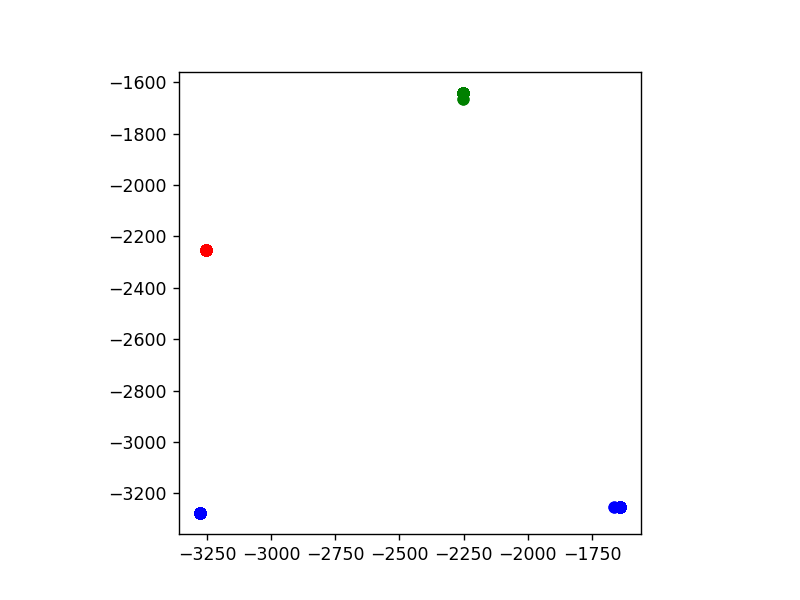

In [10]:
# Deque for axes
mag_x = deque(maxlen=HISTORY_SIZE)
mag_y = deque(maxlen=HISTORY_SIZE)
mag_z = deque(maxlen=HISTORY_SIZE)

fig, ax = plt.subplots(1, 1)
ax.set_aspect(1)

# close port in case its open
# if serialport:
#     try:
#         serialport.close()
#     except NameError:
#         pass

serialport = None
anim = None


def onClick(event):
    anim.event_source.stop()
    
def animate(i):
    for _ in range(30):
        ret = get_imu_data()
        if not ret:
            continue
        x, y, z = ret[6:9]
        mag_x.append(x)
        mag_y.append(y)
        mag_z.append(z)
        
   

    # Clear all axis
    ax.cla()

    # Display the sub-plots
    ax.scatter(mag_x, mag_y, color='r')
    ax.scatter(mag_y, mag_z, color='g')
    ax.scatter(mag_z, mag_x, color='b')
    
    if len(mag_x) == HISTORY_SIZE:
        anim.event_source.stop()
    # Pause the plot for INTERVAL seconds 
    plt.pause(INTERVAL)

fig.canvas.mpl_connect('button_press_event', onClick)    
anim = FuncAnimation(fig, animate)

X range:  -3276.8 -3252.79
Y range:  -3276.8 -2253.21
Z range:  -3276.8 -1641.18
Final calibration in uTesla: [-3264.795, -2765.005, -2458.9900000000002]


<IPython.core.display.Javascript object>


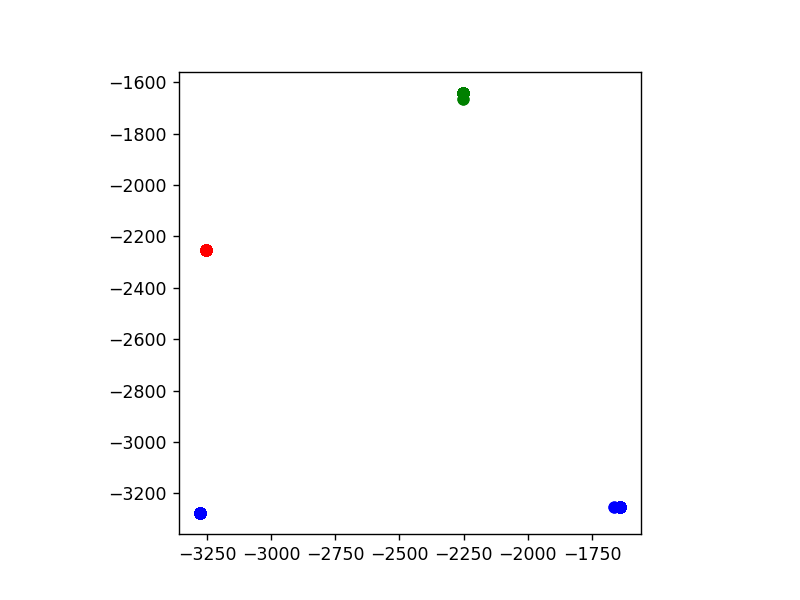

In [11]:
min_x = min(mag_x)
max_x = max(mag_x)
min_y = min(mag_y)
max_y = max(mag_y)
min_z = min(mag_z)
max_z = max(mag_z)

print("X range: ", min_x, max_x)
print("Y range: ", min_y, max_y)
print("Z range: ", min_z, max_z)

mag_calibration = [ (max_x + min_x) / 2, (max_y + min_y) / 2, (max_z + min_z) / 2]
print("Final calibration in uTesla:", mag_calibration)

cal_mag_x = [x - mag_calibration[0] for x in mag_x]
cal_mag_y = [y - mag_calibration[1] for y in mag_y]
cal_mag_z = [z - mag_calibration[2] for z in mag_z]

fig, ax = plt.subplots(1, 1)
ax.set_aspect(1)

# Clear all axis
ax.cla()

# Display the now calibrated data
ax.scatter(cal_mag_x, cal_mag_y, color='r')
ax.scatter(cal_mag_y, cal_mag_z, color='g')
ax.scatter(cal_mag_z, cal_mag_x, color='b')
fig.show()

# Gyroscope offset calibration

Put down the board and do not touch or move it!
3...2...1...COLLECTING GYRO DATA
Opened COM3
configsip: 0, SPIWP:0xee

clk_drv:0x00,q_drv:0x00,d_drv:0x00,cs0_drv:0x00,hd_drv:0x00,wp_drv:0x00

mode:DIO, clock div:1

load:0x3fff0030,len:1344

load:0x40078000,len:13836

load:0x40080400,len:3608

entry 0x400805f0

Sensor Lab - IMU Calibration!

Calibration filesys test

CRC: 8C31

No calibration loaded/found... will start with defaults

Looking for a magnetometer

Found a MMC5603 IMU

------------------------------------

Sensor:       MMC5603

Type:         Magnetic (uT)

Driver Ver:   1

Unique ID:    12345

Min Value:    -3000.00

Max Value:    3000.00

Resolution:   0.01

------------------------------------



Looking for a gyroscope

Could not find a gyroscope, skipping!

Looking for a accelerometer

Could not find a accelerometer, skipping!

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768



Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.0

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00,0.00,0.00,0.0000,0.0000,0.0000,-3276.80,-3276.80,-3276.80

Raw:0,0,0,0,0,0,-32768,-32768,-32768

Uni:0.00

<IPython.core.display.Javascript object>


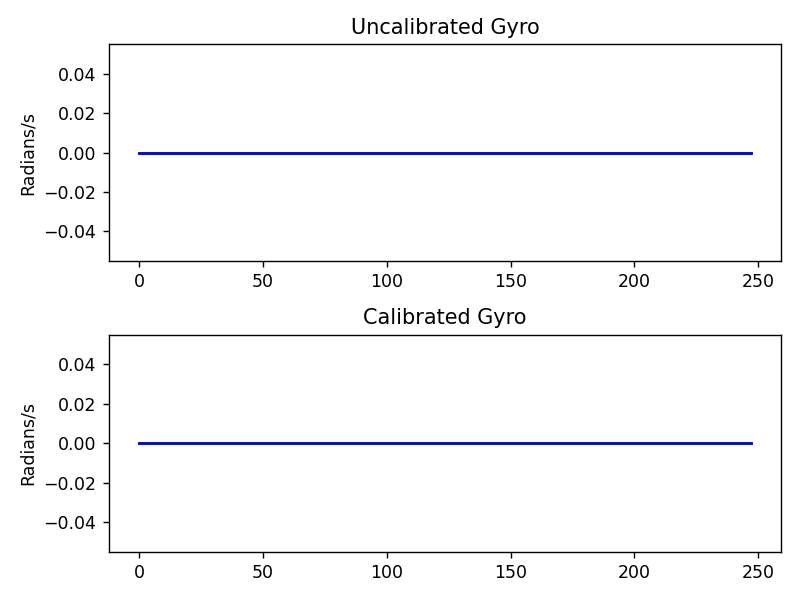

In [12]:
print("Put down the board and do not touch or move it!")
for s in range(3, 0, -1):
    print(s, end='...')
    time.sleep(1)
print("COLLECTING GYRO DATA")

# close port in case its open
if serialport:
    try:
        serialport.close()
    except NameError:
        pass

serialport = None

# Deque for axes
gyro_x = deque(maxlen=HISTORY_SIZE//10)
gyro_y = deque(maxlen=HISTORY_SIZE//10)
gyro_z = deque(maxlen=HISTORY_SIZE//10)
while len(gyro_x) < (HISTORY_SIZE//10):
    ret = get_imu_data()
    #print(ret)
    if not ret:
        continue
    x, y, z = ret[3:6]
    gyro_x.append(x)
    gyro_y.append(y)
    gyro_z.append(z)

for _ in range(3):
    gyro_x.popleft()
    gyro_y.popleft()
    gyro_z.popleft()

min_x = min(gyro_x)
max_x = max(gyro_x)
min_y = min(gyro_y)
max_y = max(gyro_y)
min_z = min(gyro_z)
max_z = max(gyro_z)

print("Gyro X range: ", min_x, max_x)
print("Gyro Y range: ", min_y, max_y)
print("Gyro Z range: ", min_z, max_z)

gyro_calibration = [ (max_x + min_x) / 2, (max_y + min_y) / 2, (max_z + min_z) / 2]
print("Final calibration in rad/s:", gyro_calibration)

fig, (uncal, cal) = plt.subplots(2, 1)

# Clear all axis
uncal.cla()
t = np.linspace(0, len(gyro_x), len(gyro_x))
# plot uncalibrated data
uncal.plot(t, gyro_x, color='r')
uncal.plot(t, gyro_y, color='g')
uncal.plot(t, gyro_z, color='b')
uncal.title.set_text("Uncalibrated Gyro")
uncal.set(ylabel='Radians/s')
# plot calibrated data
cal.plot(t, [x - gyro_calibration[0] for x in gyro_x], color='r')
cal.plot(t, [y - gyro_calibration[1] for y in gyro_y], color='g')
cal.plot(t, [z - gyro_calibration[2] for z in gyro_z], color='b')
cal.title.set_text("Calibrated Gyro")
cal.set(ylabel='Radians/s')

fig.tight_layout()
fig.show()
serialport.close()